In [1]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

%load_ext autoreload
%autoreload 2

### Experiment 3b - Coupled 2-box with vertical diffusion, only the atmospheric box is visible

List of experiments:

a) 2xCO2

b) High Emissions

c) Overshoot

#### Setup and Run Experiments

In [2]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 1

# Initialize forcing vectors and run scenarios
scenarios = ['2xCO2','High Emissions','Overshoot']
forcings, full_outputs, T_out = {}, {}, {}
for i, scen in enumerate(scenarios):
  full_outputs[scen] = BudykoSellers.Run_Budyko_Sellers(scen_flag=i,vert_diff_flag=1)
  forcings[scen] = full_outputs[scen]['forcing_ts'] # Don't tile the forcing like the other experiments
  T_out[scen] = np.squeeze(full_outputs[scen]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


### Method X: DMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - [9.63264564]
	Test: High Emissions - [3.08245172]
	Test: Overshoot - [17.45316921]
Train: High Emissions - L2 Error
	Test: 2xCO2 - [12.4469253]
	Test: High Emissions - [0.26006702]
	Test: Overshoot - [5.93168952]
Train: Overshoot - L2 Error
	Test: 2xCO2 - [13.86364345]
	Test: High Emissions - [7.85683404]
	Test: Overshoot - [3.28545995]


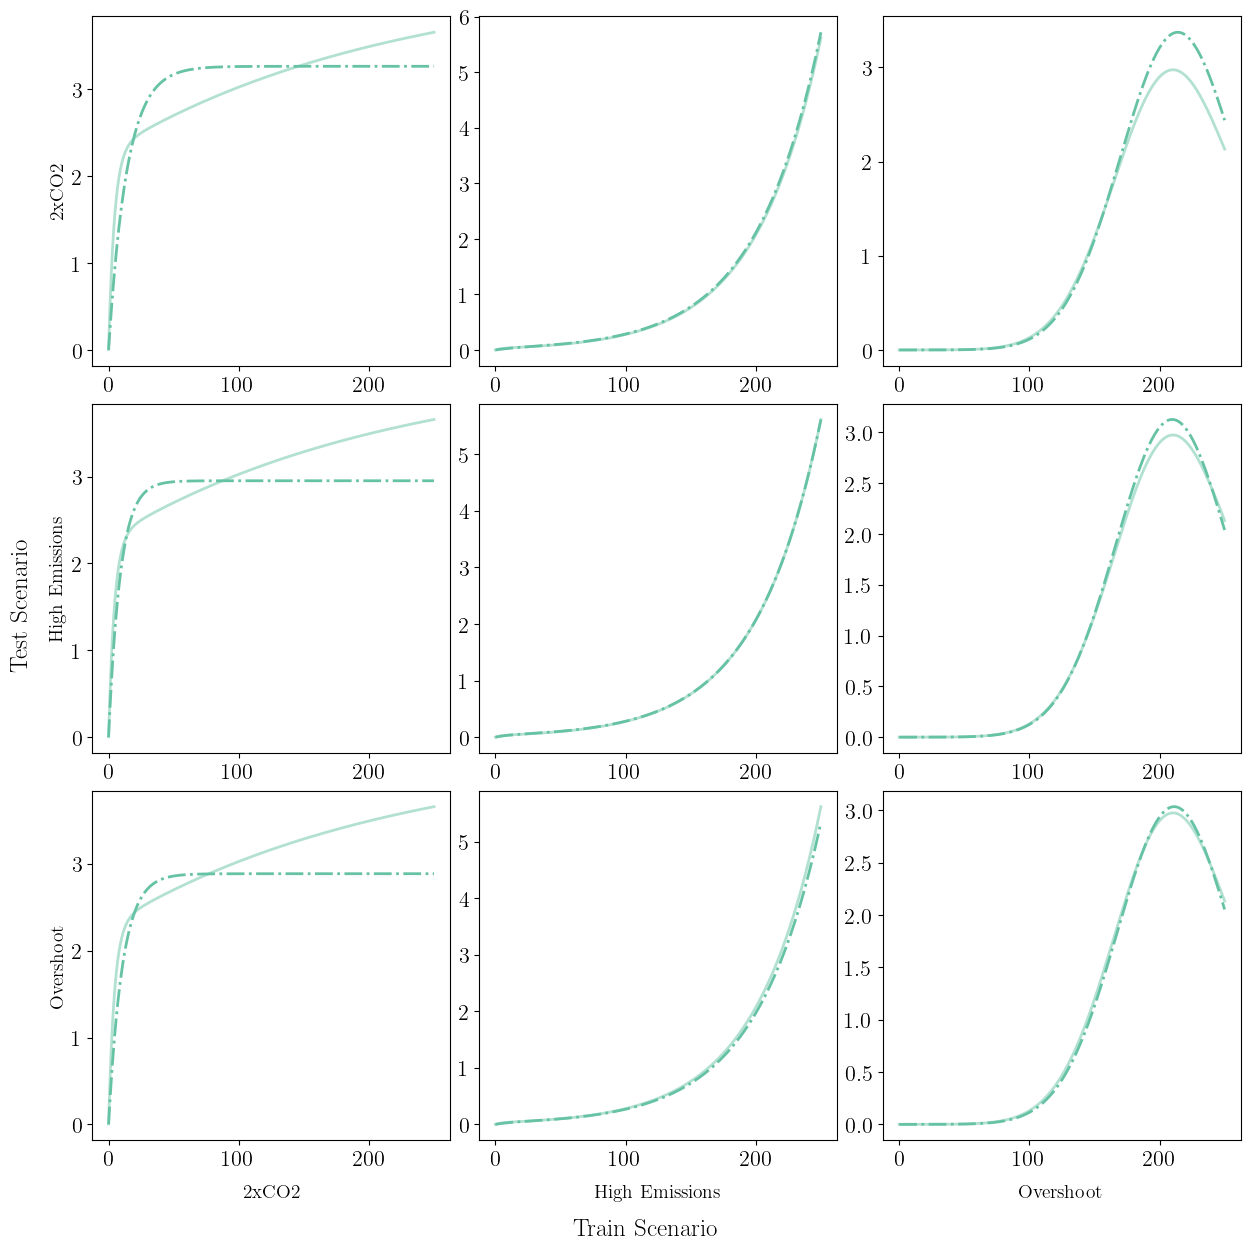

In [3]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_DMD, T_pred_DMD, error_metrics_DMD = emulator_utils.emulate_scenarios('DMD', scenarios=scenarios, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt, n_steps=n_steps, n_boxes=n_boxes)
emulator_utils.plot_true_pred(T_out, T_pred_DMD, scenarios)

### Method X: EDMD

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - [9.63264564]
	Test: High Emissions - [87.51082085]
	Test: Overshoot - [36.78085083]
Train: High Emissions - L2 Error
	Test: 2xCO2 - [13.22256955]
	Test: High Emissions - [0.22261473]
	Test: Overshoot - [5.26372237]
Train: Overshoot - L2 Error
	Test: 2xCO2 - [14.61907994]
	Test: High Emissions - [17.9579252]
	Test: Overshoot - [1.02420421]


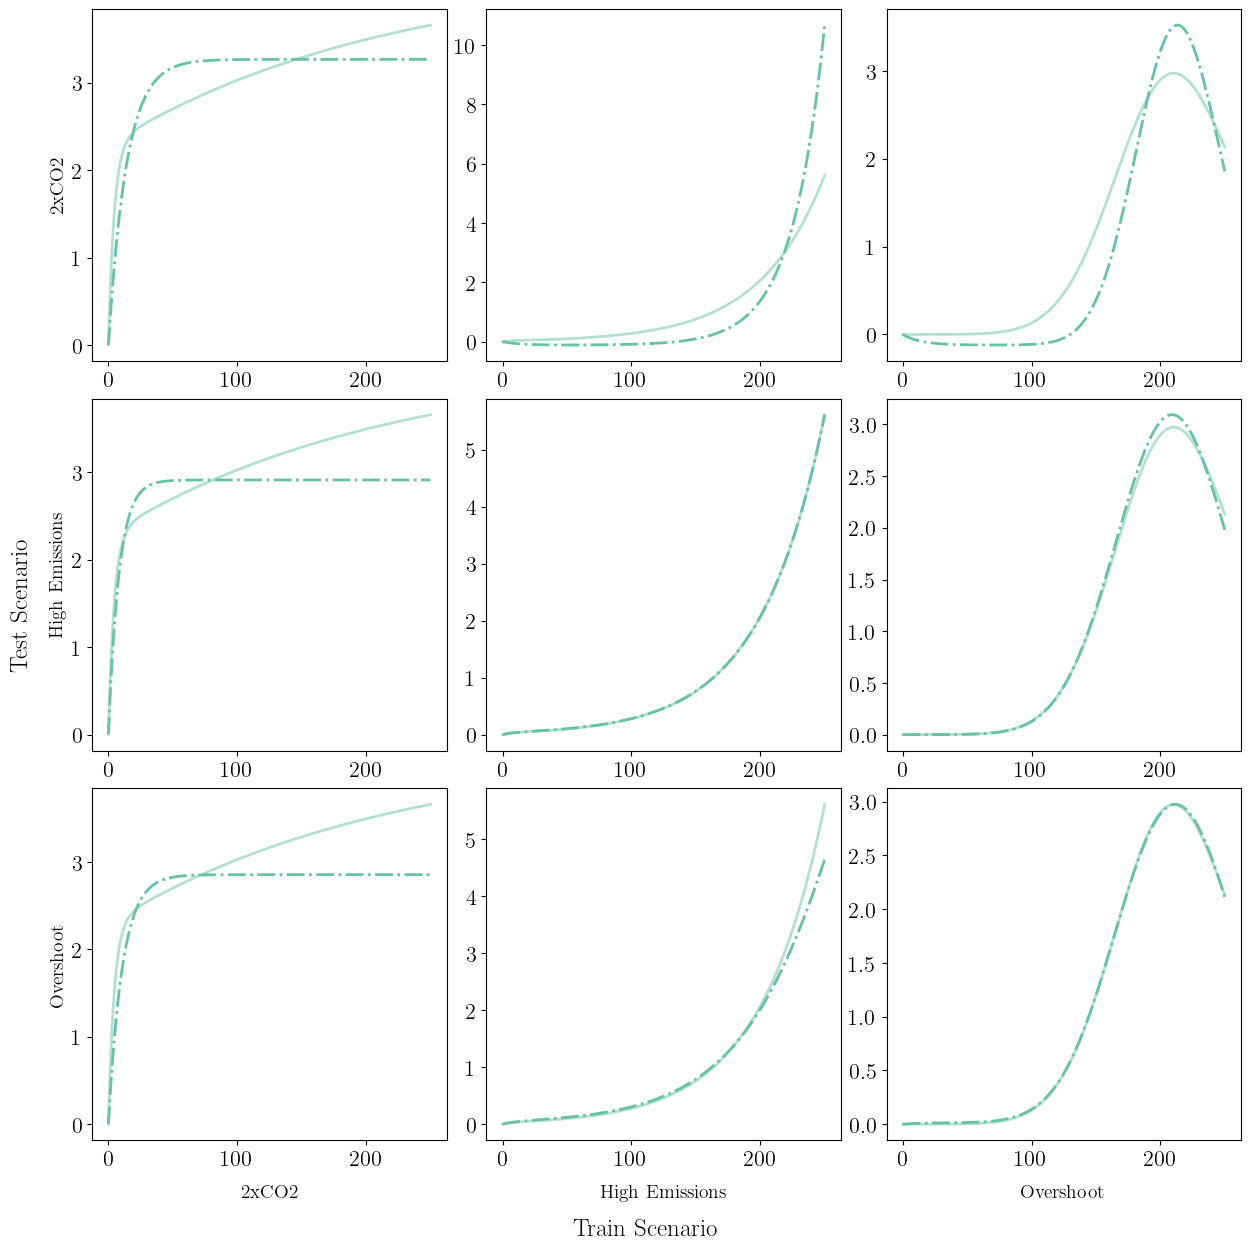

In [4]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
w_dict = emulator_utils.Vector_Dict(method='hermite', degree=1)
F_dict = emulator_utils.Vector_Dict(method='hermite', degree=2)
operator_EDMD, T_pred_EDMD, error_metrics_EDMD = emulator_utils.emulate_scenarios('EDMD', scenarios=scenarios, outputs=T_out, forcings=forcings, w0=w0, t=t, dt=dt,
                                                                n_steps=n_steps, n_boxes=n_boxes, w_dict=w_dict, F_dict=F_dict)
emulator_utils.plot_true_pred(T_out, T_pred_EDMD, scenarios)

### Method X: Deconvolution

Train: 2xCO2 - L2 Error
	Test: 2xCO2 - [4.10816034e-15]
	Test: High Emissions - [1.64815993]
	Test: Overshoot - [1.00592556]
Train: High Emissions - L2 Error
	Test: 2xCO2 - [1.05473328]
	Test: High Emissions - [1.20287165e-13]
	Test: Overshoot - [1.5940435]
Train: Overshoot - L2 Error
	Test: 2xCO2 - [802357.35620527]
	Test: High Emissions - [35153.34019314]
	Test: Overshoot - [1.41680375e-13]


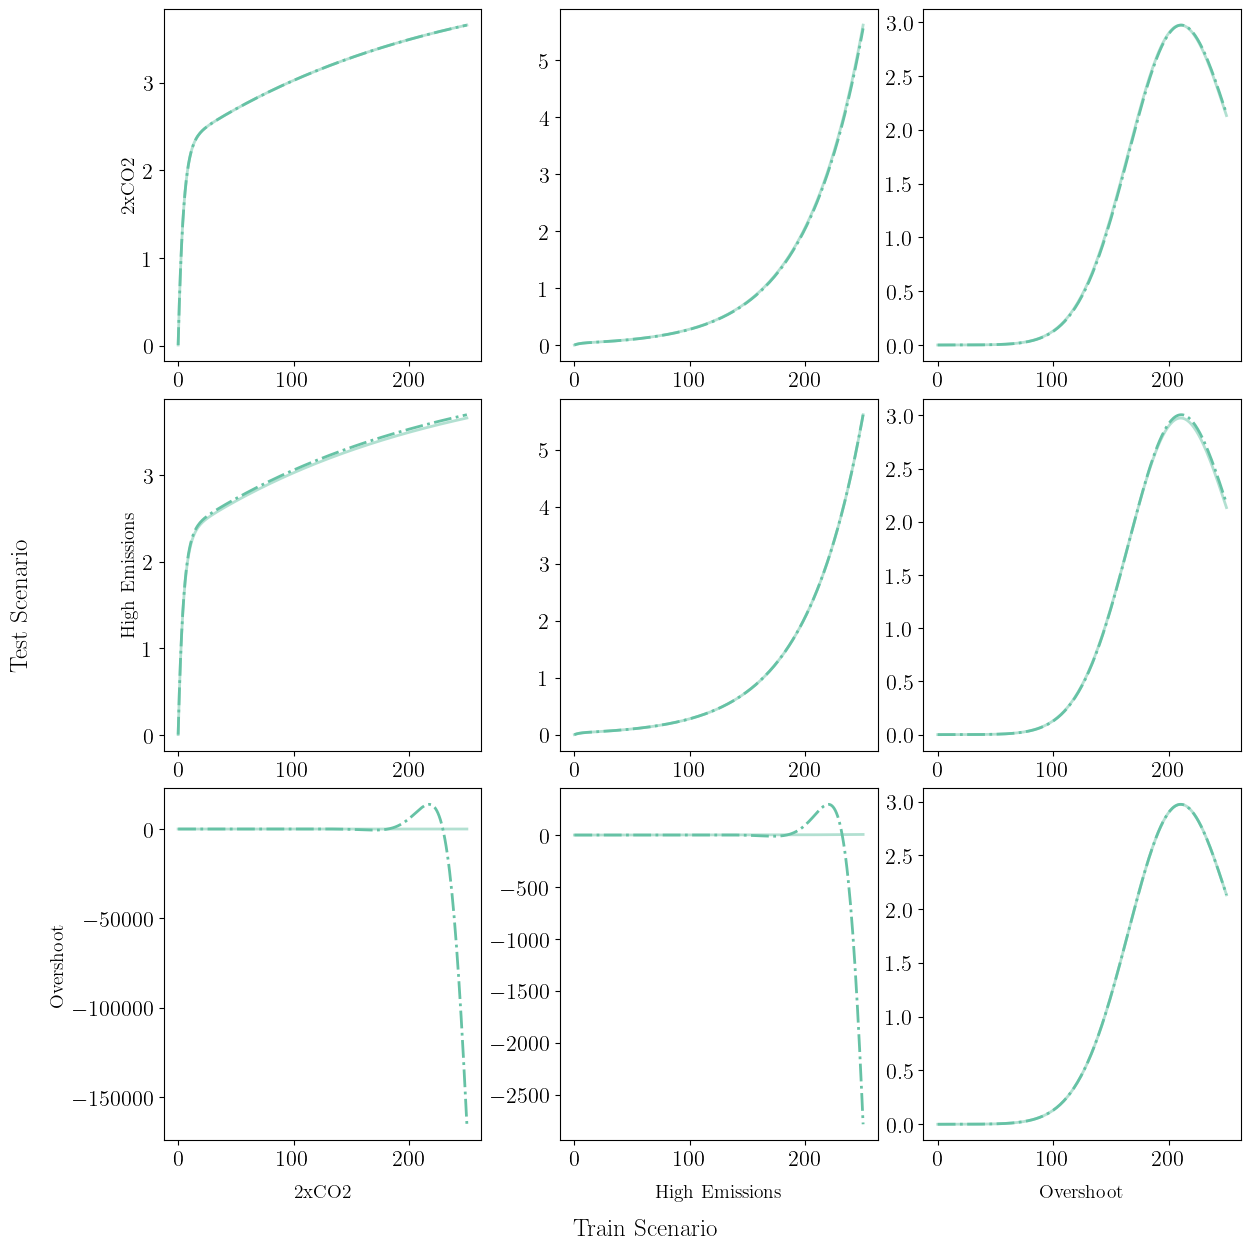

In [5]:
n_steps = len(t)
w0 = np.zeros(n_boxes)
dt = 1
operator_deconvolve, T_pred_deconvolve, error_metrics_deconvolve = emulator_utils.emulate_scenarios('deconvolve', scenarios=scenarios, outputs=T_out, forcings=forcings, dt=dt)
emulator_utils.plot_true_pred(T_out, T_pred_deconvolve, scenarios)

### Method X: Direct Diagnosis (FDT)

Train: Impulse Forcing - L2 Error


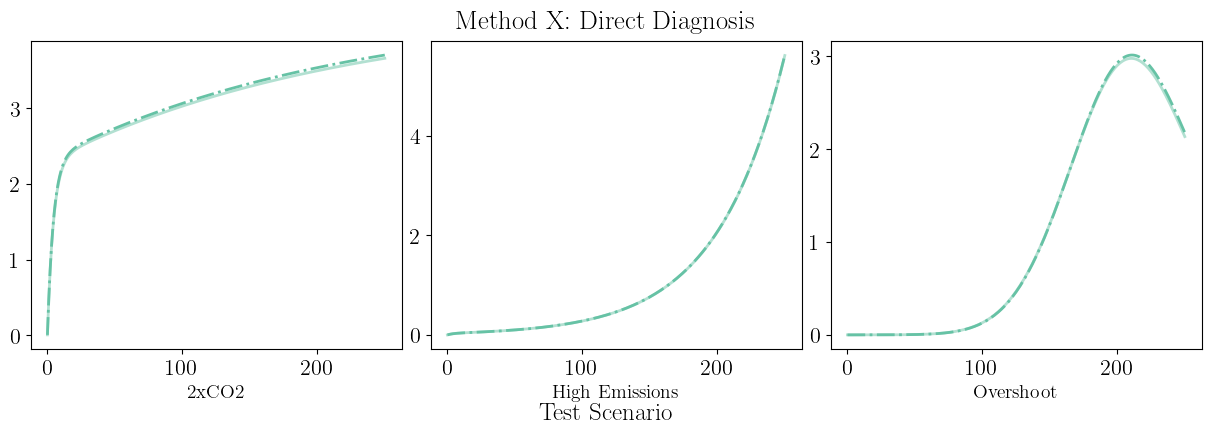

In [6]:
operator_direct, T_pred_direct, error_metrics_direct = emulator_utils.emulate_scenarios('direct', scenarios=scenarios, outputs=T_out, forcings=forcings, n_boxes=n_boxes, dt=dt, vert_diff_flag=1)
emulator_utils.plot_true_pred_direct(T_out, T_pred_direct, scenarios)

### Method X: Exponential Fit

Train: 2xCO2 - L2 Error
Step 0, cost=46.652088
Step 100, cost=6.598435
Step 200, cost=6.019429
Step 300, cost=4.985795
Step 400, cost=4.633510
Step 500, cost=3.223955
Step 600, cost=1.953370
Step 700, cost=1.919456
Step 800, cost=1.911316
Step 900, cost=1.920549
[ 0.27323052  3.9318857  -0.00998998 -1.068694  ]
	Test: 2xCO2 - [4.04121917]
	Test: High Emissions - [1.59752103]
	Test: Overshoot - [3.2736492]
Train: High Emissions - L2 Error
Step 0, cost=26.621637
Step 100, cost=0.296261
Step 200, cost=0.270539
Step 300, cost=0.277494
Step 400, cost=0.280598
Step 500, cost=0.279815
Step 600, cost=0.275685
Step 700, cost=0.269423
Step 800, cost=0.262264
Step 900, cost=0.255205
[ 1.4474697   0.74219805 -0.7605941  -3.4773235 ]
	Test: 2xCO2 - [21.67577368]
	Test: High Emissions - [1.57869117]
	Test: Overshoot - [17.95547653]
Train: Overshoot - L2 Error
Step 0, cost=23.820446
Step 100, cost=2.339360
Step 200, cost=1.977343
Step 300, cost=2.255328
Step 400, cost=0.573046
Step 500, cost=0.584969

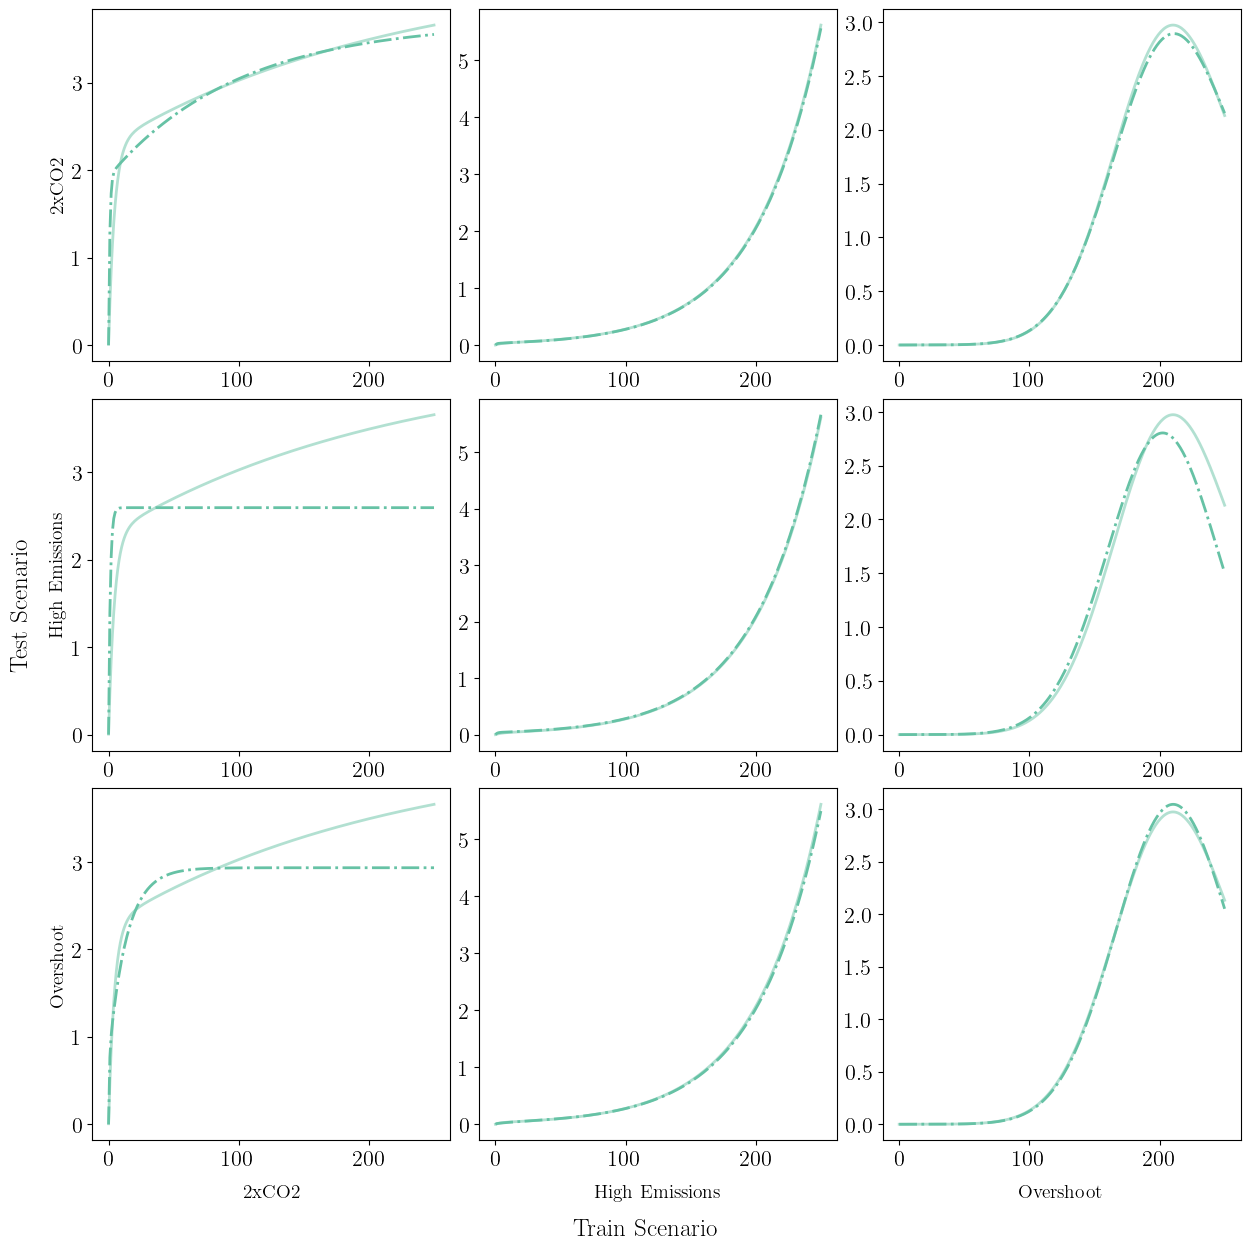

In [7]:
operator_fit, T_pred_fit, error_metrics_fit = emulator_utils.emulate_scenarios('fit_jax', scenarios=scenarios, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=2, B=np.ones(n_boxes), verbose=True)
emulator_utils.plot_true_pred(T_out, T_pred_fit, scenarios)

Train: 2xCO2 - L2 Error
[ 5.998309  -1.8498995 -5.3923783 -1.4866418]
	Test: 2xCO2 - [0.08420458]
	Test: High Emissions - [1.52601901]
	Test: Overshoot - [0.98636279]
Train: High Emissions - L2 Error
[ 4.0054483 -4.8049903 -4.227039  -3.4559875]
	Test: 2xCO2 - [47.19994779]
	Test: High Emissions - [1.08117272]
	Test: Overshoot - [52.68179047]
Train: Overshoot - L2 Error
[ 3.5517402 -2.6904147 -1.2352567 -2.3622189]
	Test: 2xCO2 - [14.41210007]
	Test: High Emissions - [7.11753531]
	Test: Overshoot - [2.90602604]


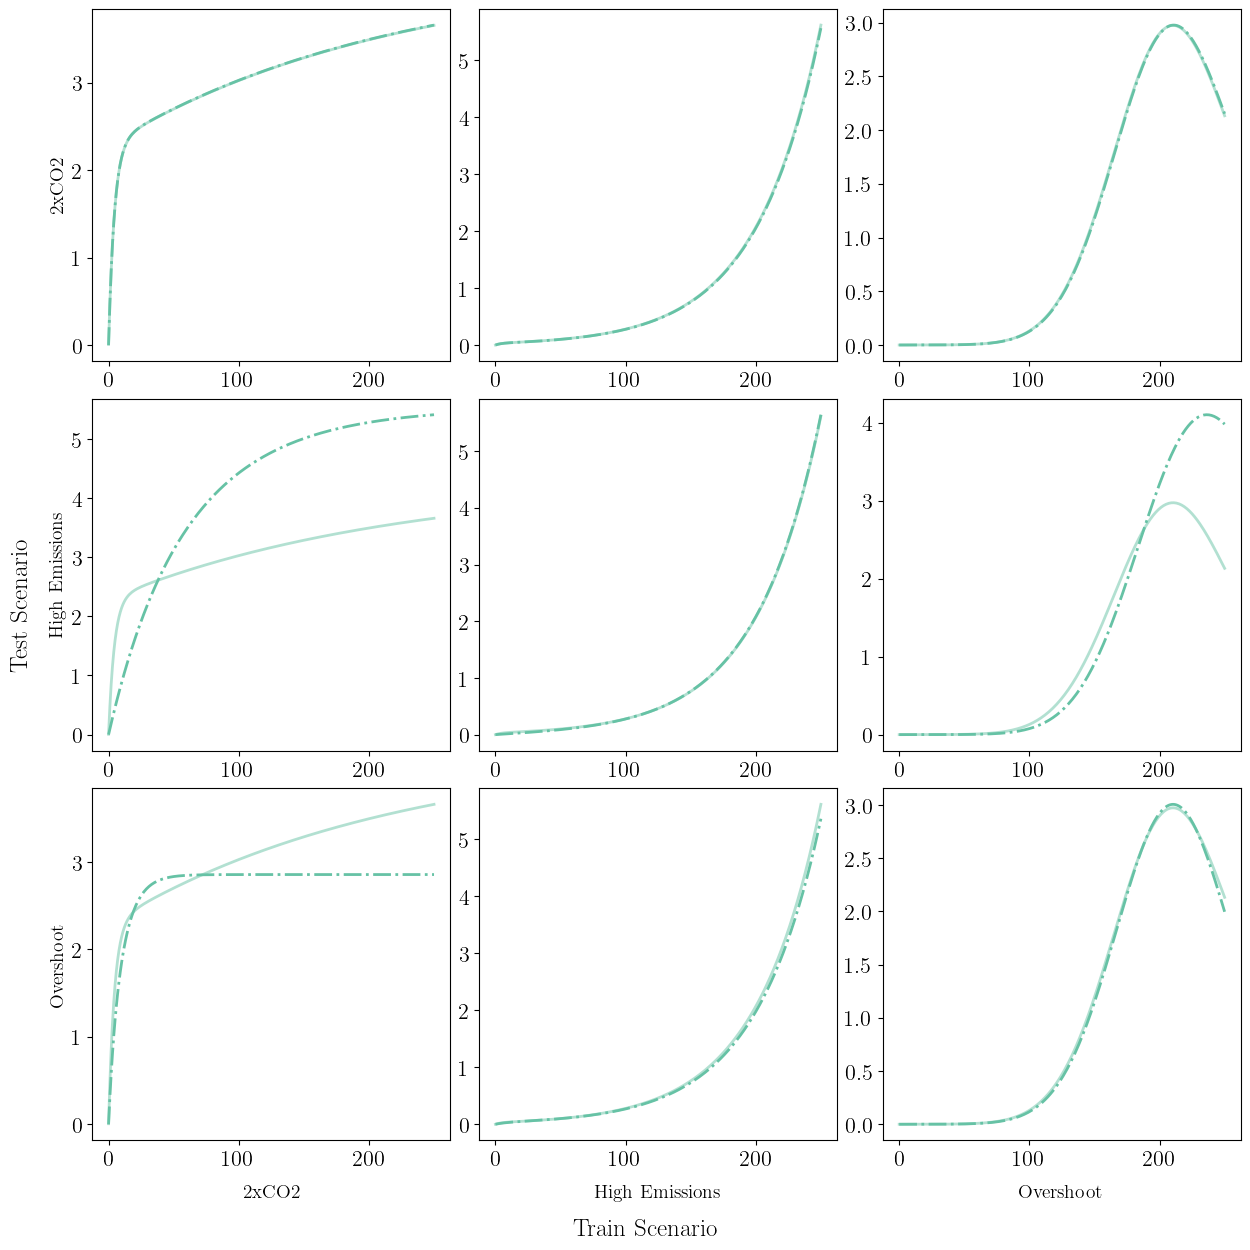

In [13]:
operator_fit, T_pred_fit, error_metrics_fit = emulator_utils.emulate_scenarios('fit_amp', scenarios=scenarios, outputs=T_out, forcings=forcings, t=t, dt=dt, n_boxes=n_boxes, n_modes=2, B=np.ones(n_boxes), verbose=True)
emulator_utils.plot_true_pred(T_out, T_pred_fit, scenarios)